In [1]:
import numpy as np
import control as ct
from planar_quad import PlanarQuad
import matplotlib.pyplot as plt

In [22]:
mass = 0.6
length = 0.2
inertia = 0.15
gravity = 9.81
dt = 0.01
quad = PlanarQuad(dt, mass, length, inertia, gravity)
A, B = quad.linear_dyn(np.zeros((6, )), np.array([quad.m * quad.g / 2, quad.m * quad.g / 2]))
C = np.array([[1, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0]])

# Start with a diagonal weighting
Q_ctrl = np.array([[1e+2, 0., 0., 0., 0., 0.],
                           [0., 1e+2, 0., 0., 0., 0.],
                           [0., 0., 1e+2, 0., 0., 0.],
                           [0., 0., 0., 1e+2, 0., 0.],
                           [0., 0., 0., 0., 1e+2, 0.],
                           [0., 0., 0., 0., 0., 1e+2]])

R_ctrl = np.array([[1e-03, 0.],
                           [0., 1e-03]])

K, _, _ = ct.dlqr(A, B, Q_ctrl, R_ctrl)  

Q_est = np.eye(6)
R_est = np.eye(2)

L, _, _ = ct.dlqe(A, np.eye(6), C, Q_est, R_est)  

T = 1000

x0 = np.array([0.1, 0., 0., 0., 0, 0.])
x0_est = np.array([0.1, 0., 0., 0., 0, 0.])
x0_est_0 = np.array([0.1, 0., 0., 0., 0, 0.])

t = np.zeros([T+1,])
x = np.empty([6, T+1])
x_est = np.empty([6, T+1])
x[:,0] = x0
x_est[:,0] = x0_est
u = np.zeros([2, T])

x_est_0 = np.empty([6, T+1])
x_est_0[:,0] = x0_est_0
u_0 = np.zeros([2, T])

delta = np.empty([6, T+1])
delta[:,0] = np.zeros(6)

a = np.array([-0.1, -0.1])

for i in range(T):
    w = 0.001*np.random.randn(6)
    v = 0.005*np.random.randn(2)
    a += np.array([0.0001*i, 0.0])
    u[:,i] = -K@(x_est[:,i]) + np.array([quad.m * quad.g / 2, quad.m * quad.g / 2])
    y = C@x[:,i] + v + a

    y_0 = C@x[:,i] + v

    A, B = quad.linear_dyn(x_est[:,i], u[:,i])
    x_est[:,i+1] = (A- B@K)@x_est[:,i] + L@(y - C@x_est[:,i])
    
    A, B = quad.linear_dyn(x_est_0[:,i], u[:,i])
    x_est_0[:,i+1] = A@x_est_0[:,i] - B@K@(x_est[:,i]) + L@(y_0 - C@x_est_0[:,i])

    delta[:,i+1] = (A - B@K - L@C)@delta[:,i] + L@a
    x[:,i+1] = quad.get_next_state(x[:,i], u[:,i]) + w
    t[i+1] = t[i] + 0.01

state = x
state_est = x_est
state_est_0 = x_est_0

Text(0.5, 0, 'Time [s]')

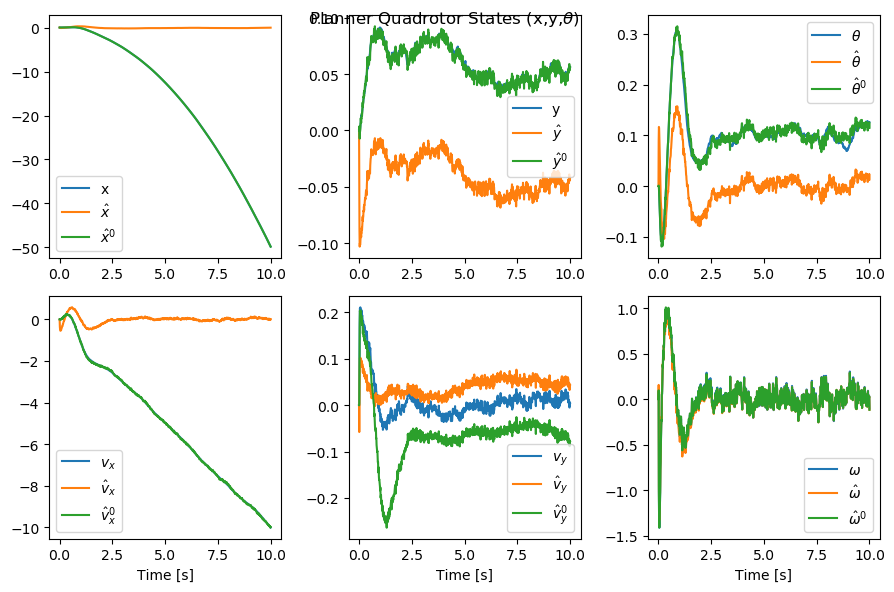

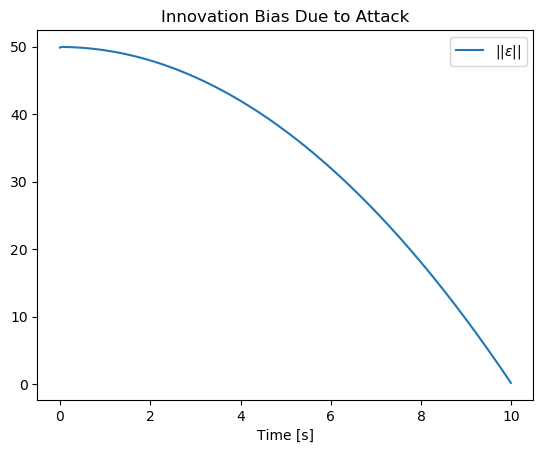

In [23]:
plt.figure(figsize=[9,6])
plt.suptitle('Planner Quadrotor States (x,y,$\\theta$)')
plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_est[0,:])
plt.plot(t, state_est_0[0,:])
plt.legend(['x','$\hat{x}$','$\hat{x}^0$'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_est[2,:])
plt.plot(t, state_est_0[2,:])
plt.legend(['y', '$\hat{y}$', '$\hat{y}^0$'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_est[4,:])
plt.plot(t, state_est_0[4,:])
plt.legend(['$\\theta$','$\hat{\\theta}$', '$\hat{\\theta}^0$'])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_est[1,:])
plt.plot(t, state_est_0[1,:])
plt.legend(['$v_x$','$\hat{v}_x$', '$\hat{v}_x^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_est[3,:])
plt.plot(t, state_est_0[3,:])
plt.legend(['$v_y$','$\hat{v}_y$', '$\hat{v}_y^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_est[5,:])
plt.plot(t, state_est_0[5,:])
plt.legend(['$\omega$','$\hat{\omega}$', '$\hat{\omega}^0$'])
plt.xlabel('Time [s]')
plt.tight_layout()


# we can also plot the control
plt.figure()
plt.title('Innovation Bias Due to Attack')
plt.plot(t[:-1], np.linalg.norm(-C@delta[:,:-1]+ np.repeat(np.reshape(a,(2,1)), T, axis=1), axis=0)) 
plt.legend(['$||{\epsilon}||$'])
plt.xlabel('Time [s]')

# # we can also plot the control
# plt.figure()
# plt.plot(t[:-1], u.T)
# plt.legend(['u1', 'u2'])
# plt.xlabel('Time [s]')


In [5]:
quad.animate(state,u)

TypeError: PlanarQuad.animate() missing 1 required positional argument: 'goal'

In [15]:
mass = 0.6
length = 0.2
inertia = 0.15
gravity = 9.81
dt = 0.01
quad = PlanarQuad(dt, mass, length, inertia, gravity)
A, B = quad.linear_dyn(np.zeros((6, )), np.array([quad.m * quad.g / 2, quad.m * quad.g / 2]))
C = np.array([[1, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0]])
# Start with a diagonal weighting
Q_ctrl = np.array([[1e+2, 0., 0., 0., 0., 0.],
                           [0., 1e+2, 0., 0., 0., 0.],
                           [0., 0., 1e+2, 0., 0., 0.],
                           [0., 0., 0., 1e+2, 0., 0.],
                           [0., 0., 0., 0., 1e+2, 0.],
                           [0., 0., 0., 0., 0., 1e+2]])

R_ctrl = np.array([[1e-03, 0.],
                           [0., 1e-03]])

K, _, _ = ct.dlqr(A, B, Q_ctrl, R_ctrl)  

Q_est = np.eye(6)
R_est = np.eye(2)

L, _, _ = ct.dlqe(A, np.eye(6), C, Q_est, R_est)  

A_delta = np.block([[A-B@K, B@K, np.zeros((6,6)), np.zeros((6,6))], 
                   [np.zeros((6,6)), A-L@C, np.zeros((6,6)), np.zeros((6,6))],
                   [np.zeros((6,6)), np.zeros((6,6)), A - B@K - L@C, np.zeros((6,6))],
                   [np.zeros((6,6)), np.zeros((6,6)), np.zeros((6,6)), np.eye((6))]])

B_delta = np.block([[np.zeros((6,2))],
                    [-L@np.eye(2)],
                    [L@np.eye(2)],
                    [np.zeros((6,2))]
                    ])
W_delta = np.block([[np.eye(6), np.zeros((6,2))],
                    [np.eye(6), -L],
                    [np.zeros((6,6)),np.zeros((6,2))],
                    [np.zeros((6,6)),np.zeros((6,2))]])

C_tilde = np.array([[1, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0]])
C_delta = np.block([[C_tilde,np.zeros((2,6)),np.zeros((2,6)), np.zeros((2,6))],
                    [np.zeros((2,6)),np.zeros((2,6)),C_tilde, np.zeros((2,6))],
                   [np.zeros((6,6)),np.zeros((6,6)),np.zeros((6,6)), np.eye(6)]])

M = np.block([np.zeros((2,6)),np.zeros((2,6)),-C, np.zeros((2,6))])
Q_delta_est = np.eye(24)
R_delta_est = np.eye(10)
Lo, _, _ = ct.dlqe(A_delta, np.eye(24), C_delta, Q_delta_est, R_delta_est)  
T =1000
t = np.zeros([T+1,])
x0 = np.array([0.1, 0., 0., 0., 0, 0.])

eta = np.empty([24, T+1])
eta_est = np.empty([24, T+1])
epsilon = np.empty([2, T])

eta[:,0] = np.block([x0, np.zeros(6), np.zeros(6), np.array([1,-1,0,0,0,0])])
eta_est[:,0] = np.block([x0, np.zeros(6), np.zeros(6), np.array([0.1,0.1,0,0,0,0])])
epsilon[:,0] = np.zeros(2)
a = np.array([-0.1, -0.1])

for i in range(T):
    w = 0.001*np.random.randn(6)
    v = 0.001*np.random.randn(2)
    w_tilde = np.block([w,v])
    epsilon[:,i] = M@eta[:,i] + a
    eta[:,i+1] = A_delta@eta[:,i] + B_delta@a + W_delta@w_tilde
    y = C_delta@eta[:,i] 
    eta_est[:,i+1] = A_delta@eta_est[:,i] + B_delta@a + Lo@(y - C_delta@eta_est[:,i])

    t[i+1] = t[i] + 0.01
state = eta[:6,:] 
state_est = eta_est[:6,:] 

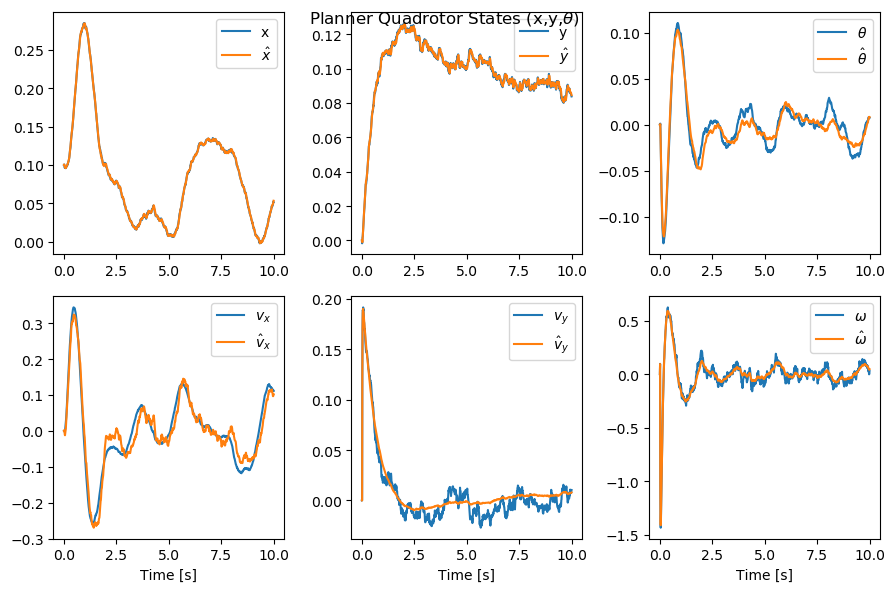

In [13]:
plt.figure(figsize=[9,6])
plt.suptitle('Planner Quadrotor States (x,y,$\\theta$)')
plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_est[0,:])
plt.legend(['x','$\hat{x}$','$\hat{x}^0$'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_est[2,:])
plt.legend(['y', '$\hat{y}$', '$\hat{y}^0$'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_est[4,:])
plt.legend(['$\\theta$','$\hat{\\theta}$', '$\hat{\\theta}^0$'])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_est[1,:])
plt.legend(['$v_x$','$\hat{v}_x$', '$\hat{v}_x^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_est[3,:])
plt.legend(['$v_y$','$\hat{v}_y$', '$\hat{v}_y^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_est[5,:])
plt.legend(['$\omega$','$\hat{\omega}$', '$\hat{\omega}^0$'])
plt.xlabel('Time [s]')
plt.tight_layout()

In [39]:
import cvxpy as cp
from scipy.linalg import sqrtm

def solve_lmi(A, B, C, W, Bo, Lo, eta_est, M_xi, n_states=6, verbosity=0):
    rho = cp.Constant(0.5) 
    d_max = cp.Constant(10)


    n = n_states*4 # Augmented state dim
    m = B.shape[1] # Attack vector dim
    q = W.shape[1] # Augmented dis dim
    p = C.shape[0] # Augmented meas dim
    
    G1 = cp.Variable((n,n))
    G2 = cp.Variable((n,n))
    G12 = cp.Variable((n,n))

    Q1 = cp.Variable((n,n), PSD=True)
    Q2 = cp.Variable((n,n), PSD=True)
    

    Y = cp.Variable((m,n))
    #Z = cp.Variable((n,n))
    
    gamma = cp.Variable()
    sigma = cp.Variable()


    Q_curly = 1*np.eye(n_states)
    T = np.block([np.eye(n_states), np.zeros((n_states,n_states)),np.zeros((n_states,n_states)),-np.eye(n_states)])
    T_curly = np.block([T, T])
  
    Q = cp.bmat([[Q1 , np.zeros((n,n))],[np.zeros((n,n)), Q2]])
    G = cp.bmat([[G1 , np.zeros((n,n))],[G12, G2]])
    G_tilde = cp.bmat([[G1 + G1.T - Q1, G12.T],[G12, G2 + G2.T - Q2]])


    #spade_1 = cp.bmat([[Z + Bo@Y + Lo@C@(G12+G1), Lo@C@G2],[(A - Lo@C)@(G12+G1) - Z + (B - Bo)@Y, (A - Lo@C)@G2]])
    
    spade_1 = cp.bmat([[(A-Lo@C)@G1 + Bo@Y + Lo@C@(G12+G1), Lo@C@G2],[(A - Lo@C)@(G12+G1) - (A-Lo@C)@G1 + (B - Bo)@Y, (A - Lo@C)@G2]])

    spade_2 = cp.bmat([[np.zeros((n,q)), Lo],[W, -Lo]])

    # block_eq1 = cp.bmat([
    #     [(1-rho)*G_tilde, np.zeros((2*n,p+q)),spade_1.T, (sqrtm(Q_curly)@T_curly@G).T],
    #     [np.zeros((p+q,2*n)), rho*np.eye(p+q)/d_max, spade_2.T, np.zeros((p+q,n_states))],
    #     [spade_1, spade_2, Q,  np.zeros((2*n,n_states))],
    #     [sqrtm(Q_curly)@T_curly@G, np.zeros((n_states,p+q)),np.zeros((n_states,2*n)), gamma*np.eye(n_states)]])
    
    
    block_eq1 = cp.bmat([
        [(1-rho)*G_tilde - gamma*np.eye(2*n) , np.zeros((2*n,p+q)),spade_1.T],
        [np.zeros((p+q,2*n)), rho*np.eye(p+q)/d_max, spade_2.T],
        [spade_1, spade_2, Q]])
    

    block_eq2 = cp.bmat([
        [np.eye(1) - sigma*np.eye(1), eta_est.T],
        [eta_est,Q1]])
    
    block_eq3 = cp.bmat([
        [sigma*M_xi, np.eye(n)],
        [np.eye(n),Q2]])
    
    const = [block_eq1 >> 0, block_eq2>>0, block_eq3>>0]
    prob = cp.Problem(cp.Maximize(gamma), constraints = const)
    try:
        prob.solve(solver = cp.MOSEK, verbose=False)
        cost = gamma.value
    except Exception as e:
        print(e)
        cost = -1       
    return {
        'cost': cost,
        #'A': np.round(np.array(Z.value@ np.linalg.inv(G1.value)), 3),
        'F': np.round(np.array(Y.value @ np.linalg.inv(G1.value)), 3),
        'Q1': np.round(np.array(Q1.value), 3),
        'Q2': np.round(np.array(Q2.value), 3),
        'gamma': gamma
    }

res = solve_lmi(A_delta, B_delta, C_delta, W_delta, B_delta, Lo, np.zeros((24,1)), np.eye(24), n_states=6)

In [45]:
import cvxpy as cp
from scipy.linalg import sqrtm

def solve_lmi(A, B, C, W, Bo, Lo, eta_est, M_xi, n_states=6, verbose=True):
    rho = cp.Constant(0.005) 
    d_max = cp.Constant(1000)


    n = n_states*4 # Augmented state dim
    m = B.shape[1] # Attack vector dim
    q = W.shape[1] # Augmented dis dim
    p = C.shape[0] # Augmented meas dim
    
    G1 = cp.Variable((n,n))
    G2 = cp.Variable((n,n))
    G12 = cp.Variable((n,n))

    # Q1 = cp.Variable((n,n), PSD=True)
    # Q2 = cp.Variable((n,n), PSD=True)
    
    Q1 = cp.Variable((n_states,n_states))
    #Q2 = cp.Variable((n_states,n_states), PSD=True)

    Y = cp.Variable((m,n))
    Z = cp.Variable((n,n))
    
    gamma = cp.Variable()
    sigma = cp.Variable()


    Q_curly = 2*np.eye(n_states)
    T = np.block([np.eye(n_states), np.zeros((n_states,n_states)),np.zeros((n_states,n_states)),-np.eye(n_states)])
    T_curly = np.block([T, T])
  
    #Q = cp.bmat([[Q1 , np.zeros((n,n))],[np.zeros((n,n)), Q2]])
    #Q_hat = cp.bmat([[T.T@Q1@T , np.zeros((n,n))],[np.zeros((n,n)), T.T@Q2@T]])
    
    #Q_hat = cp.bmat([[Q1 , np.zeros((n_states,n_states))],[np.zeros((n_states,n_states)), Q2]])

    G = cp.bmat([[G1 , np.zeros((n,n))],[G12, G2]])
    G_tilde = G + G.T - T_curly.T@(Q1)@T_curly
    
    #cp.bmat([[G1 + G1.T - T.T@(Q1)@T, G12.T],[G12, G2 + G2.T - T.T@(Q1)@T]])


    spade_1 = cp.bmat([[Z + Bo@Y + Lo@C@(G12+G1), Lo@C@G2],[(A - Lo@C)@(G12+G1) - Z + (B - Bo)@Y, (A - Lo@C)@G2]])
    spade_2 = cp.bmat([[np.zeros((n,q)), Lo],[W, -Lo]])
    # block_eq1 = cp.bmat([
    #     [(1-rho)*G_tilde, np.zeros((2*n,p+q)),(T_curly@spade_1).T, (sqrtm(Q_curly)@T_curly@G).T],
    #     [np.zeros((p+q,2*n)), rho*np.eye(p+q)/d_max, (T_curly@spade_2).T, np.zeros((p+q,n_states))],
    #     [T_curly@spade_1, T_curly@spade_2, T_curly@Q@T_curly.T,  np.zeros((n_states,n_states))],
    #     [sqrtm(Q_curly)@T_curly@G, np.zeros((n_states,p+q)),np.zeros((n_states,n_states)), gamma*np.eye(n_states)]])
    
    block_eq1 = cp.bmat([
        [(1-rho)*G_tilde, np.zeros((2*n,p+q)),spade_1.T, (sqrtm(Q_curly)@T_curly@G).T],
        [np.zeros((p+q,2*n)), rho*np.eye(p+q)/d_max, spade_2.T, np.zeros((p+q,n_states))],
        [spade_1, spade_2, T_curly.T@(Q1)@T_curly,  np.zeros((2*n,n_states))],
        [sqrtm(Q_curly)@T_curly@G, np.zeros((n_states,p+q)),np.zeros((n_states,2*n)), gamma*np.eye(n_states)]])


    block_eq2 = cp.bmat([
        [np.eye(1) - sigma*np.eye(1), eta_est.T],
        [eta_est,T.T@Q1@T]])
    
    block_eq3 = cp.bmat([
        [sigma*M_xi, np.eye(n)],
        [np.eye(n),T.T@Q1@T]])
    

    const = [block_eq1 >> 0]#, block_eq2>>0, block_eq3>>0]
    prob = cp.Problem(cp.Maximize(gamma), constraints = const)
    try:
        prob.solve(solver = cp.MOSEK, eps=1e-6, verbose=verbose)
        cost = gamma.value
        return {
            'cost': cost,
            'Y': np.round(np.array(Y.value), 6),
            'Z': np.round(np.array(Z.value), 6),
            'A': np.round(np.array(Z.value@ np.linalg.inv(G1.value)), 6),
            'F': np.round(np.array(Y.value@T@np.linalg.inv(G1.value)), 6),
            'Q1': np.round(np.array(Q1.value), 6),
            #'Q2': np.round(np.array(Q2.value), 6),
            'gamma': gamma.value
        }
    except Exception as e:
        print(e)
        cost = -1    
        return None   
    
    
A_delta = np.block([[A-B@K, B@K, np.zeros((6,6)), np.zeros((6,6))], 
                   [np.zeros((6,6)), A-L@C, np.zeros((6,6)), np.zeros((6,6))],
                   [np.zeros((6,6)), np.zeros((6,6)), A - B@K - L@C, np.zeros((6,6))],
                   [A-B@K, B@K, np.zeros((6,6)), np.zeros((6,6))]])  
res = solve_lmi(A_delta, B_delta, C_delta, W_delta, B_delta, Lo, np.zeros((24,1)), np.eye(24), n_states=6)

                                     CVXPY                                     
                                     v1.5.0                                    
(CVXPY) Jun 10 06:47:05 PM: Your problem has 2389 variables, 12996 constraints, and 0 parameters.
(CVXPY) Jun 10 06:47:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 10 06:47:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 10 06:47:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


(CVXPY) Jun 10 06:47:05 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 10 06:47:05 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 10 06:47:05 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Jun 10 06:47:05 PM: Applying reduction FlipObjective
(CVXPY) Jun 10 06:47:05 PM: Applying reduction Dcp2Cone
(CVXPY) Jun 10 06:47:05 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jun 10 06:47:05 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jun 10 06:47:05 PM: Applying reduction MOSEK
(CVXPY) Jun 10 06:47:05 PM: Finished problem compilation (took 1.838e-01 seconds).
-------------------------------------------------------------------------------
                  

In [ ]:
N =100
t = np.zeros([N+1,])
x0 = np.array([0.1, 0., 0., 0., 0, 0.])

eta = np.empty([24, N+1])
eta_est = np.empty([24, N+1])
a = np.empty([2, N])

eta[:,0] = np.block([x0, np.zeros(6), np.zeros(6), np.array([10.0,10.0,0,0,0,0])])
eta_est[:,0] = np.block([np.array([0.1, 0., 0., 0., 0, 0.]), np.zeros(6), np.zeros(6), np.array([10.0,10.0,0,0,0,0])])

Q_delta_est = 0.1*np.eye(24)
R_delta_est = 0.1*np.eye(10)
Lo, _, _ = ct.dlqe(A_delta, np.eye(24), C_delta, Q_delta_est, R_delta_est)  
a[:,0] = np.zeros(2)

T = np.block([np.eye(6), np.zeros((6,6)),np.zeros((6,6)),-np.eye(6)])
M_xi = 10*np.eye(24)

for i in range(N):
    w = 0.001*np.random.randn(6)
    v = 0.01*np.random.randn(2)
    w_tilde = np.block([w,v])
    
    res = solve_lmi(A_delta, B_delta, C_delta, W_delta, B_delta, Lo, np.reshape(eta_est[:,i], (24,1)), M_xi, n_states=6, verbose=False)
 
    A_obs = res['A']
    #A_obs = A_delta - Lo@C_delta
    F_obs = res['F']
    Q1_obs  = res['Q1']
    Q2_obs  = res['Q2']
    M_xi = Q2_obs*(1/(1-eta_est[:,i].T@np.linalg.inv(Q1_obs)@eta_est[:,i]))

    a[:,i] = F_obs@eta_est[:,i]
    print(res['gamma'])
    print(a[:,i])
    #print(res['Z'])
    # print(res['A'])
    #a[:,i] = np.array([1.0,1.0])
    eta[:,i+1] = A_delta@eta[:,i] + B_delta@a[:,i] + W_delta@w_tilde
    y_tilde = C_delta@eta[:,i]
    eta_est[:,i+1] = A_obs@eta_est[:,i] + B_delta@a[:,i] + Lo@y_tilde
    print(eta_est[:,i])
    print(eta[:,i])
    t[i+1] = t[i] + 0.01
state = eta[:6,:] 
state_est = eta_est[:6,:] 

126884.45095327035
[0. 0.]
[ 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  10.  10.   0.   0.   0.   0. ]
[ 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  10.  10.   0.   0.   0.   0. ]
45015.03374166408
[0. 0.]
[ 6.63707477e-02  2.91511153e-01 -3.18651348e-14 -3.02893056e-12
 -5.30401140e-02  3.33966834e-01  1.88517785e-03  1.22309736e-01
  4.39956193e-16  2.73563310e-14 -3.70833410e-02 -3.39155611e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.18033989e+00  6.18033989e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[ 1.00882763e-01 -1.11155084e-03 -8.13891134e-04 -1.08163523e-04
  2.82913544e-05  9.30438054e-02 -1.44888818e-03 -1.32216949e-02
  1.04275519e-03  1.71004001e-03  3.12148794e-03  4.01465405e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+01  1.

TypeError: 'NoneType' object is not subscriptable

ValueError: x and y must have same first dimension, but have shapes (101,) and (1001,)

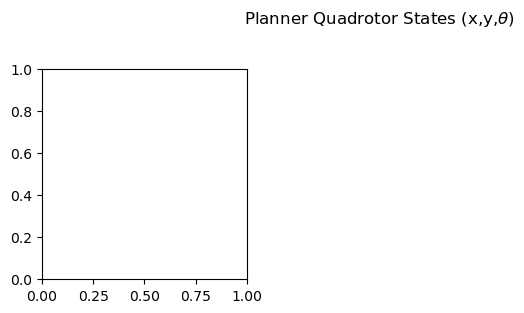

In [ ]:
plt.figure(figsize=[9,6])
plt.suptitle('Planner Quadrotor States (x,y,$\\theta$)')
plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_est[0,:])
plt.legend(['x','$\hat{x}$','$\hat{x}^0$'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_est[2,:])
plt.legend(['y', '$\hat{y}$', '$\hat{y}^0$'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_est[4,:])
plt.legend(['$\\theta$','$\hat{\\theta}$', '$\hat{\\theta}^0$'])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_est[1,:])
plt.legend(['$v_x$','$\hat{v}_x$', '$\hat{v}_x^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_est[3,:])
plt.legend(['$v_y$','$\hat{v}_y$', '$\hat{v}_y^0$'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_est[5,:])
plt.legend(['$\omega$','$\hat{\omega}$', '$\hat{\omega}^0$'])
plt.xlabel('Time [s]')
plt.tight_layout()